In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the dataset
file_path = r'C:\Users\Asus\OneDrive\Documents\python\Dta science\Titanic\archive (6)\Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)


In [8]:
# Data Preprocessing
# Fill missing values in 'Age' and 'Fare' with the median, and 'Embarked' with the mode
imputer = SimpleImputer(strategy='median')
titanic_data['Age'] = imputer.fit_transform(titanic_data[['Age']])
titanic_data['Fare'] = imputer.fit_transform(titanic_data[['Fare']])

imputer = SimpleImputer(strategy='most_frequent')
titanic_data['Embarked'] = imputer.fit_transform(titanic_data[['Embarked']])

# Drop 'Cabin' column if it exists
if 'Cabin' in titanic_data.columns:
    titanic_data.drop(columns=['Cabin'], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])

# Feature Engineering
# Create new feature 'FamilySize'
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

# Drop unnecessary columns
titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Verify all columns are numeric
print(titanic_data.dtypes)

# Split the data into training and testing sets
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Survived        int64
Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked        int64
FamilySize      int64
dtype: object


In [9]:

# Model Building
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [10]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.8044692737430168
Confusion Matrix:
[[90 15]
 [20 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



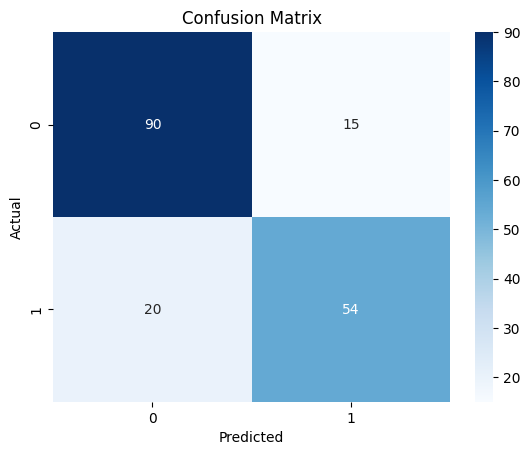

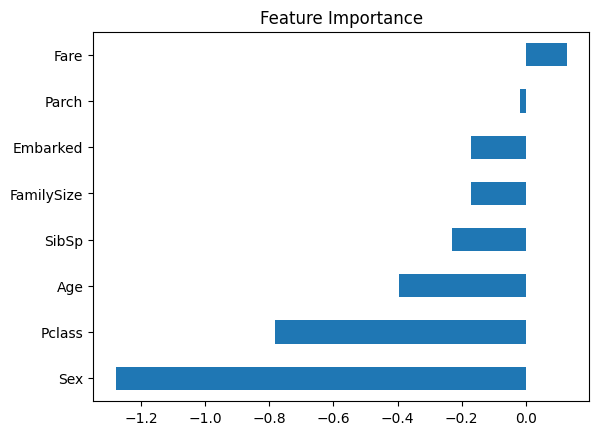

In [11]:
# Visualization
# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plotting feature importance
coefficients = pd.Series(model.coef_[0], index=X.columns)
coefficients.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()